In [1]:
#!pip install yfinance

In [2]:
from tfiers.nb import *

Preloading: numpy, matplotlib.pyplot, pandas, seaborn, janitor.
Imported `np`, `mpl`, `plt`, `sns`, `pd`


In [3]:
import yfinance

In [4]:
ticker = yfinance.Ticker("SPY")
price = ticker.history(period="5y")['Close'];

In [5]:
T_short = 4  # in business days
T_longg = 12
price_T_short_days_ago = price.shift(T_short)
price_T_longg_days_ago = price.shift(T_longg);

In [6]:
buy_short = price <= price_T_short_days_ago;
buy_longg = price <= price_T_longg_days_ago;

In [7]:
nans = pd.Series(np.nan, price.index)
buy_short_ = pd.concat((price[buy_short], nans[~buy_short])).sort_index()
buy_longg_ = pd.concat((price[buy_longg], nans[~buy_longg])).sort_index();

In [8]:
def plot(ax, date_offset):
    last_day = price.index[-1]
    t0 = last_day - pd.DateOffset(**date_offset)
    nans[t0:].asfreq('D').plot(color='black', label='', ax=ax)
    # hack to get nicely formatted xticks & labels
    # .. while not having gaps over the weekends in the price series
    # (which is what'd happen with `price.asfreq('D')`).
    price[t0:].plot(marker='.', ms=1.4, lw=0.7, label="S&P 500 closing price", color='black', ax=ax)
    buy_short_[t0:].plot(label=f"Price is lower than {T_short} business days ago",
                                     marker='.', ms=3, ax=ax)
    buy_longg_[t0:].plot(label=f"Price is lower than {T_longg} business days ago",
                                     lw=4, alpha=0.3, color='C2', solid_capstyle='round', ax=ax)
    ax.set_xlabel(None)

In [9]:
from datetime import datetime
my_timezone = datetime.now().astimezone().tzinfo
now = datetime.now(my_timezone)
title = f"Report generated on {now:%a %d %b %Y, at %H:%M (UTC%z)}";

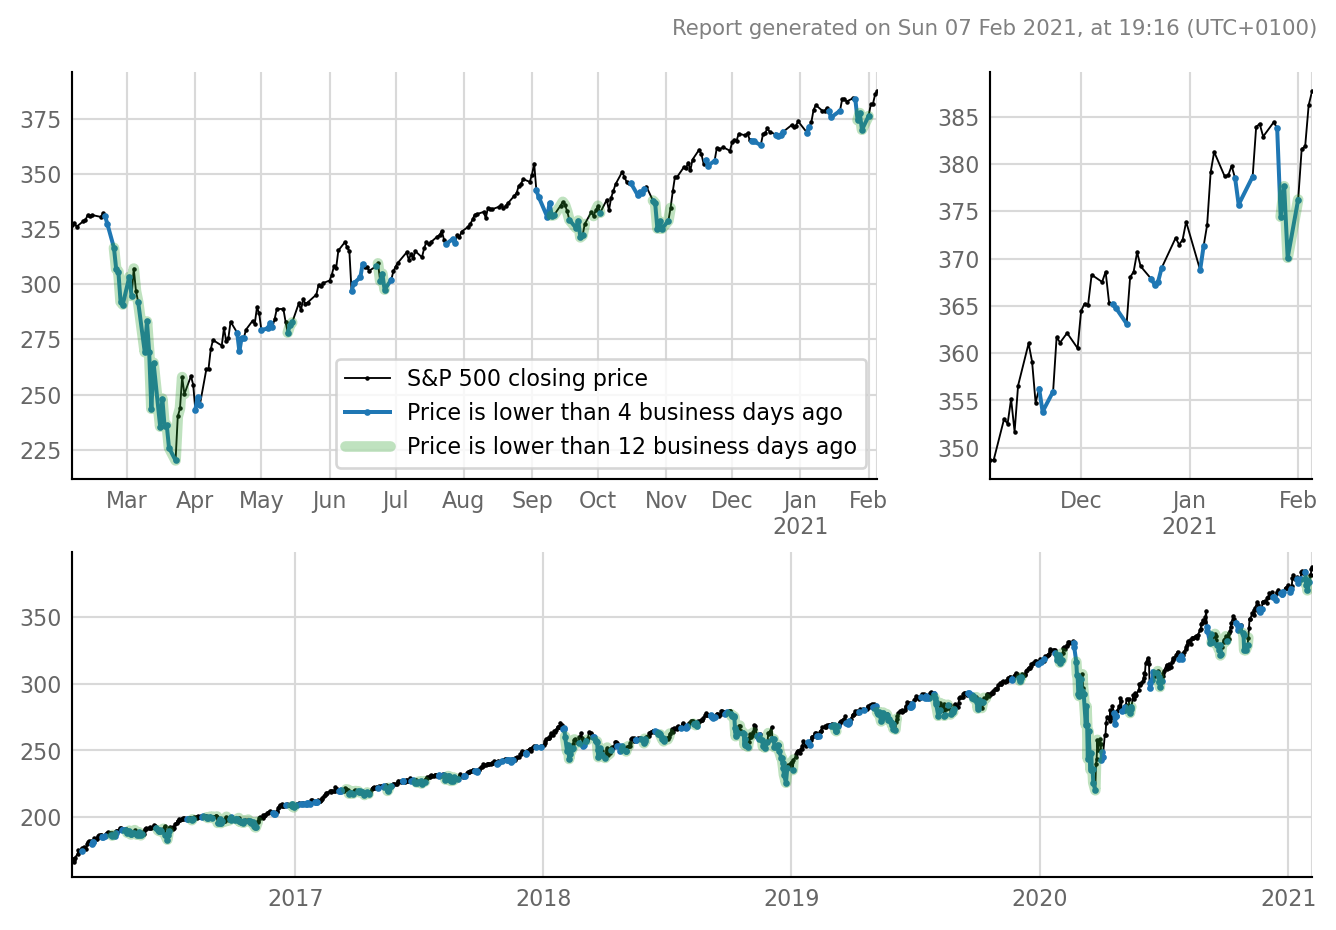

In [22]:
m = "main plot, medium duration"
l = "long duration (zoom out)"
s = "short duration (zoom in)"

durations = {
    m: dict(years=1),
    l: dict(years=5),
    s: dict(months=3),
}

fig = plt.figure(**figsize(width=800, aspect=1.5))
axes = fig.subplot_mosaic(
    [[m, s],
     [l, l]],
    gridspec_kw=dict(height_ratios=(1, 0.8), width_ratios=(1, 0.4))
)

for key, ax in axes.items():
    plot(ax, durations[key])
    if key == m:
        ax.legend()
        
fig.suptitle(title, size=8, color='grey', y=0.93, ha='left');

Remove existing figure file.

In [23]:
from pathlib import Path
desktop = Path(r"C:\Users\tfiers\Desktop");
fname_suffix = " spy.png"
for f in desktop.glob(f"*{fname_suffix}"):
    f.unlink()

In [24]:
if buy_longg[-1]:
    fname_prefix = "💰💰BUY"
elif buy_short[-1]:
    fname_prefix = "💰buy"
else:
    fname_prefix = "don't buy"

In [25]:
fig.savefig(desktop / (fname_prefix + fname_suffix), );